# Machine Learning #6 - Ağaç Bazlı Modeller, Entropi, Gini Index, Sınıflandırma ve Regresyon İçin Karar Ağaçları


Merhabalar, Machine Learning serimizin altıncı bölümünde, mdaha önce kullanımına kısaca değindiğimiz ağaç bazlı modelleri teorik olarak daha derinlemesine ele alıyoruz. 

Ağaç bazlı modeller, veri setlerini dallara ayırarak sınıflandırma ve regresyon problemlerini çözmek için kullanılan güçlü ve esnek yöntemlerdir. 

Bu bölümde;
- Entropi ve Gini index gibi temel kavramları açıklayacak, karar ağaçlarının nasıl oluşturulduğunu ve kullanıldığını detaylandıracağız. 
- Ayrıca, sınıflandırma ve regresyon problemleri için karar ağaçlarının nasıl uygulanacağını örneklerle göstereceğiz.

## Sınıflandırma için Karar Ağaçları

Etiketlenmiş bir veri kümesi verildiğinde, bir sınıflandırma ağacı, etiketleri çıkarmak için bireysel özelliklerle ilgili bir dizi if-else sorusunu öğrenir. Doğrusal modellerin aksine ağaçlar, özellikler ve etiketler arasındaki doğrusal olmayan ilişkileri yakalayabilir. Ayrıca ağaçlar, örneğin standardizasyon yoluyla özelliklerin aynı ölçekte olmasını gerektirmez.

**Sınıflandırma ağacı dediğimizde, aslında sınıflandırma görevi için eğitilmiş bir karar ağacını kast ediyoruz.**

In [206]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

X = X[['radius1', 'concave_points1']]
  
# metadata 
print("Metadata printing...")
print(breast_cancer_wisconsin_diagnostic.metadata) 
print("Metadata printed...")
  
# variable information 
print("Variables info")
print(breast_cancer_wisconsin_diagnostic.variables) 


Metadata printing...
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanti

In [207]:
breast_cancer_wisconsin_diagnostic.metadata.additional_info

{'summary': 'Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/\r\n\r\nSeparating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.\r\n\r\nThe actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-

Bu çalışma için kullanacağımız "Wisconsin Breast Cancer Dataset" isimli veri setini import ettik. Hem bu yazı serisinde, hem de Yapay Zeka üzerine pek çok başlangıç seviye kaynakta görebileceğiniz UC Irvine ML Repository'sinden, artık .csv formatında download etmemize gerek kalmadan direkt olarak bu şekilde projemize import edebiliyoruz.

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=42)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

Basitçe, bir karar ağacını bu şekilde kullanabiliyor olduğumuz tekrardan hatırlayalım. 

### Neden Karar Ağaçları?

- Verilerinizde non-lineer ilişkiler varsa ve bu ilişkileri yakalamak istiyorsanız,
- Modelin yorumlanabilirliği sizin için önemliyse ve karar verme sürecini görselleştirmek istiyorsanız,
- Kategorik veri ile çalışıyorsanız ve bu veriyi sayısal verilere dönüştürmek istemiyorsanız,
- Özellik seçimi yaparak daha önemli özellikleri öne çıkarmak istiyorsanız,
- Çoklu sınıflandırma problemleri ile çalışıyorsanız, karar ağaçları lojistik regresyona kıyasla daha avantajlı olabilir.

Sayısal olarak kıyasladığımızda da aradaki farkı göreceğiz ama çalışma şeklini daha iyi kavramak için, öncelikle görsel olarak inceleyelim. Aşağıdaki fonksiyon yardımıyla kıyaslamayı görselleştirebiliriz.

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_labeled_decision_regions(X, y, classifiers):
    # Create a mesh grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    
    fig, axarr = plt.subplots(1, len(classifiers), figsize=(15, 5), sharex='col', sharey='row')
    
    for idx, clf in enumerate(classifiers):
        Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        
        axarr[idx].contourf(xx1, xx2, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
        axarr[idx].scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=50, cmap=ListedColormap(('red', 'blue')))
        axarr[idx].set_title(clf.__class__.__name__)
    
    plt.show()

Şimdi de Lojistik Regresyon modelimizi kurgulayıp kıyaslama grafiğimizi çizdiriyoruz.

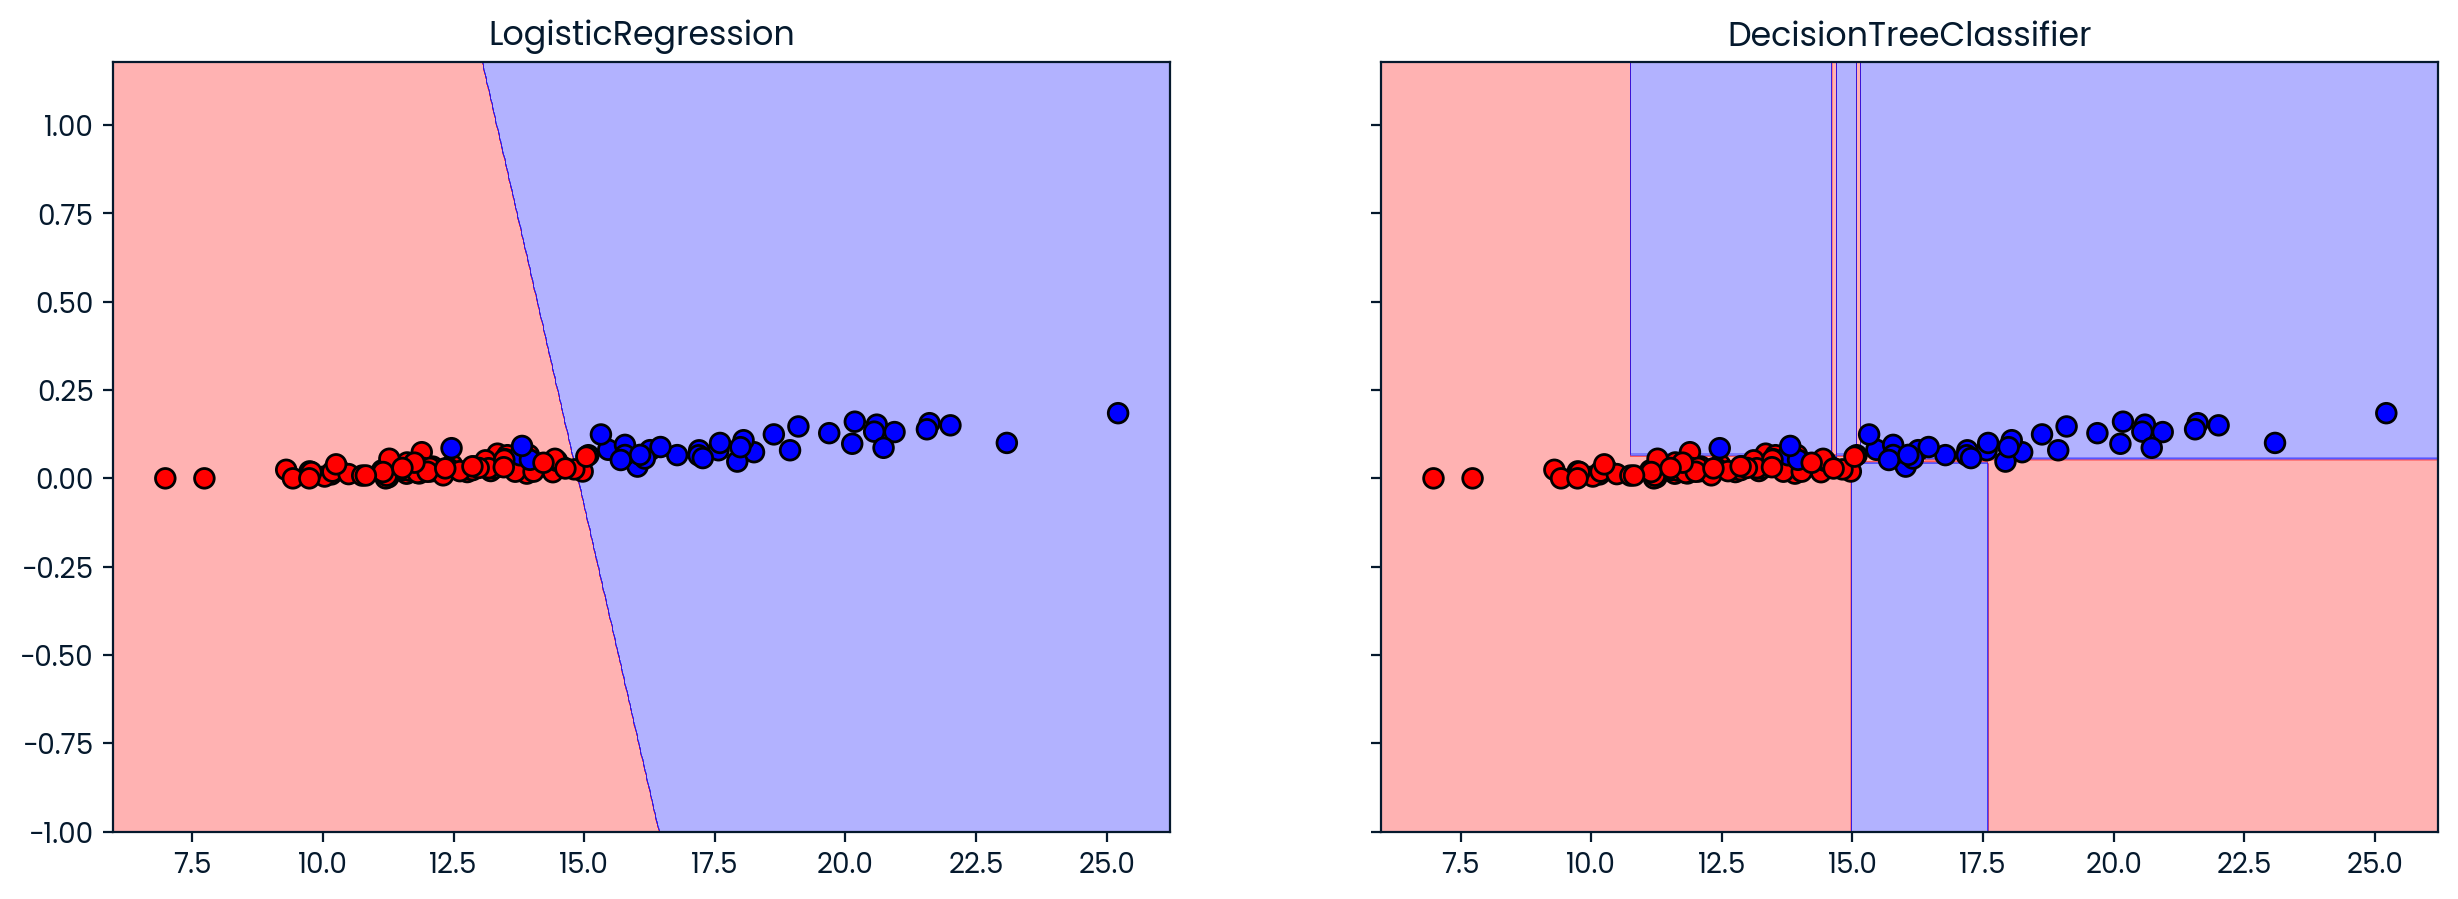

In [210]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)
# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test.values, y_test, clfs)

Veri setimiz oldukça küçük olduğu için tahminleyemediğimiz veri sayısı da oldukça az. Ancak yine de, doğrusal olmayan ilişkileri yakalama konusunda Karar Ağaçlarının sınır çizme kabiliyetinin daha iyi olduğuna dikkat edin.

### Karar Ağaçları Sınıfandırmayı Nasıl Öğrenir?

Öncelikle bazı terimleri tanımlayarak başlayalım. Karar ağacı, **düğüm** adı verilen bireysel birimlerin hiyerarşisinden oluşan bir veri yapısıdır. **Düğüm**, bir soru ya da tahmin içeren bir noktadır.

**Kök**, karar ağacının büyümeye başladığı düğümdür. Ana düğümü yoktur ve iki dal aracılığıyla 2 alt düğüme yol açan bir soruyu içerir. **Dahili düğüm**, ebeveyni olan bir düğümdür. Aynı zamanda 2 alt düğüme yol açan bir soruyu da içerir. Son olarak alt düğümü olmayan düğüme yaprak adı verilir. Bir yaprağın bir ana düğümü vardır ve hiçbir soru içermez. Bir tahminin yapıldığı yer burasıdır. Bir sınıflandırma ağacı etiketli bir veri kümesi üzerinde eğitildiğinde, ağacın özelliklerden kalıpları en saf yaprakları üretecek şekilde öğrendiğini hatırlayın. Başka bir deyişle ağaç, her yaprakta bir sınıf etiketinin baskın olacağı şekilde eğitilir.

![Ekran Resmi 2024-05-23 22.26.22](Ekran%20Resmi%202024-05-23%2022.26.22.png)


Görsel olarak da, bir karar ağacının bölümlerini bu şekilde görebiliriz. Kök(root), dal(branch), dahili düğüm(internal node) ve yaprak(leaf), bir karar ağacının bölümlerini oluşturur. 

Peki, karar ağacımız bu yaprakları oluştururken nasıl bir matematik izler?

Burada, bir regresyon ağacı bir veri seti üzerinde eğitildiğinde, bir düğümün saflığının o düğümdeki hedeflerin **ortalama karesel hatası** kullanılarak ölçüldüğüne dikkat etmek önemlidir. 

_Bu, regresyon ağacının, her bir yaprakta hedef değerlerin, o yaprağın belirli ortalama değerine mümkün olduğunca yakın olduğu yapraklar üreten bölünmeleri bulmaya çalıştığı anlamına gelir._

### Bir Düğüm için Ortalama Karesel Hata (MSE)

![mse](mse.png)


Burada N, düğümdeki örneklerin sayısıdır.

Yi, i-inci örneğin gerçek hedef değeridir.

y
ˉ
​
 , düğümdeki tüm örneklerin ortalama hedef değeridir.


### Bir Düğümdeki Hedef Değerlerin Ortalaması

![ortalama](ortalama.png)


Regresyon ağacı eğitilirken, her bölünme için MSE'yi azaltmaya çalışır. Bu nedenle, her bölünmede, yapraklardaki hedef değerlerin o yaprağın ortalama hedef değerine mümkün olduğunca yakın olmasını sağlayarak toplam MSE'yi azaltmayı hedefler.

Bu kavramları birleştirerek, regresyon ağacı her bölünmede sol ve sağ alt düğümlerin MSE'lerinin toplamını minimize etmeye çalışır. Bu minimizasyona, **Toplam Saflık Azalması** adı verilir.

### Toplam Saflık Azalması

![saflik_azalma](saflik_azalma.png)


$MSE_{parent}$, ana düğümün MSE'sidir.

$MSE_{left}$ ve $MSE_{right}$ sol ve sağ alt düğümlerin MSE'leridir.

$N_{total}$, ana düğümdeki toplam örnek sayısıdır.

$N_{left}$ ve $N_{right}$, sol ve sağ alt düğümlerdeki örnek sayılarıdır.

Regresyon ağacı algoritması, her bölünmede saflık azalmasını (ΔMSE) maksimize etmeye çalışır. Bu saflık azalması kavramını ölçmek için de **Bilgi Kazancı**'nı kullanırız.

## Bilgi Kazancı (Information Gain) Nedir?

Bilgi Kazancı, bir veri kümesini belirli bir özelliğe göre bölerek belirsizliği veya saflığı azaltma derecesini ölçer. Karar ağaçları oluşturulurken, her bölünme adımında hangi özelliğin kullanılacağını seçerken bu ölçümden yararlanılır. Amaç, bilgi kazancını maksimize edecek şekilde veri kümesini bölmektir.

### Entropi ve Bilgi Kazancı

Bilgi Kazancı, entropi kavramına dayanır. Entropi, bir veri kümesindeki belirsizliğin veya rastgeleliğin bir ölçüsüdür. Yüksek entropi, veri kümesinin daha karmaşık veya daha rastgele olduğunu, düşük entropi ise daha düzenli olduğunu gösterir.

## Entropi Hesaplama

Entropi, bir veri kümesindeki belirsizliği ölçmek için kullanılır. Entropi denklemi şu şekildedir:

$$
H(D) = - \sum_{i=1}^{k} p_i \log_2(p_i)
$$

Burada:
- \( H(D) \) veri kümesi \( D \) için entropidir.
- \( k \), sınıf sayısıdır.
- $p_{i}$, i-nci sınıfın olasılığıdır.

## Bilgi Kazancı Hesaplama

Bilgi kazancı, bir veri kümesini belirli bir özelliğe göre böldüğümüzde entropideki azalma miktarıdır:

$$
IG(D, A) = H(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} H(D_v)
$$

Burada:
- IG(D, A), veri kümesi (D) için özellik (A)'nın bilgi kazancıdır.
- (H(D)), veri kümesinin (bölünmeden önceki) entropisidir.
- Values}(A), özellik \( A \)'nın alabileceği farklı değerler kümesidir.
- $D_{v}$, \( A \) özelliği \( v \) değerini aldığında veri kümesinin alt kümesidir.
- |D|, veri kümesindeki toplam örnek sayısıdır.
- $|D_{v}|$, \( v \) değerine sahip alt kümedeki örnek sayısıdır.
- H($D_{v}$), alt kümenin entropisidir.

**Özet:**
- Entropi, bir veri kümesindeki belirsizliği ölçer.
- Bilgi Kazancı, bir veri kümesini belirli bir özelliğe göre böldüğümüzde entropideki azalmayı ölçer.
- Bilgi Kazancı yüksek olan bölünmeler, veri kümesini daha saf (daha az belirsiz) hale getirir ve bu nedenle karar ağaçları oluşturulurken tercih edilir.
- Bilgi Kazancı, karar ağaçlarının her düğümünde en iyi bölünmeyi seçmek için kullanılır ve bu sayede daha doğru ve etkili modeller oluşturulur.

In [211]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred_entropy = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=1)

# Fit dt_gini to the training set
dt_gini.fit(X_train, y_train)

# Use dt_gini to predict test set labels
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_gini and accuracy_entropy
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

Accuracy achieved by using the gini index: 0.895
Accuracy achieved by using entropy: 0.904


Gini indeksi ve entropi kavramları, bu bilgi kazancı kriteri için kullanılabilir. Projeden projeye, veri setinin büyüklüğü veya hiperparamatrelere göre hangi **criterion** değerinin kullanılması gerektiği değişebilir.

## Regresyon İçin Karar Ağaçları

Regresyonda hedef değişkenin **sürekli** olduğunu hatırlayın. Başka bir deyişle modelinizin çıktısı bir **reel sayı**dır. Dolayısıyla burada da bir karar ağacı kullanmak, modelimizin veri kümesini **lineer regresyon**dan daha iyi öğrenmesini sağlayabilir.

Bu çalışma için de yine UC Irvine Machine Learning Repository'den Auto MPG veri setini kullanıyoruz.

In [212]:
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [213]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = X[['displacement']]
y = y  # Assuming 'mpg' is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred for Decision Tree
y_pred_dt = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred_dt)

# Compute rmse_dt
rmse_dt = mse_dt ** 0.5

# Instantiate lr (Linear Regression)
lr = LinearRegression()

# Fit lr to the training set
lr.fit(X_train, y_train)

# Predict test set labels for Linear Regression
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 4.54
Regression Tree test set RMSE: 4.01


Regresyon ağacının lineer regresyona göre ufak da olsa bir avantaj sağladığını göstermiş olduk. Bu değerlerin de veri setinin büyüklüğü ve hiperparametrelere göre değişebileceğini unutmayın.

Son olarak bu kıyaslamayı görselleştirelim.

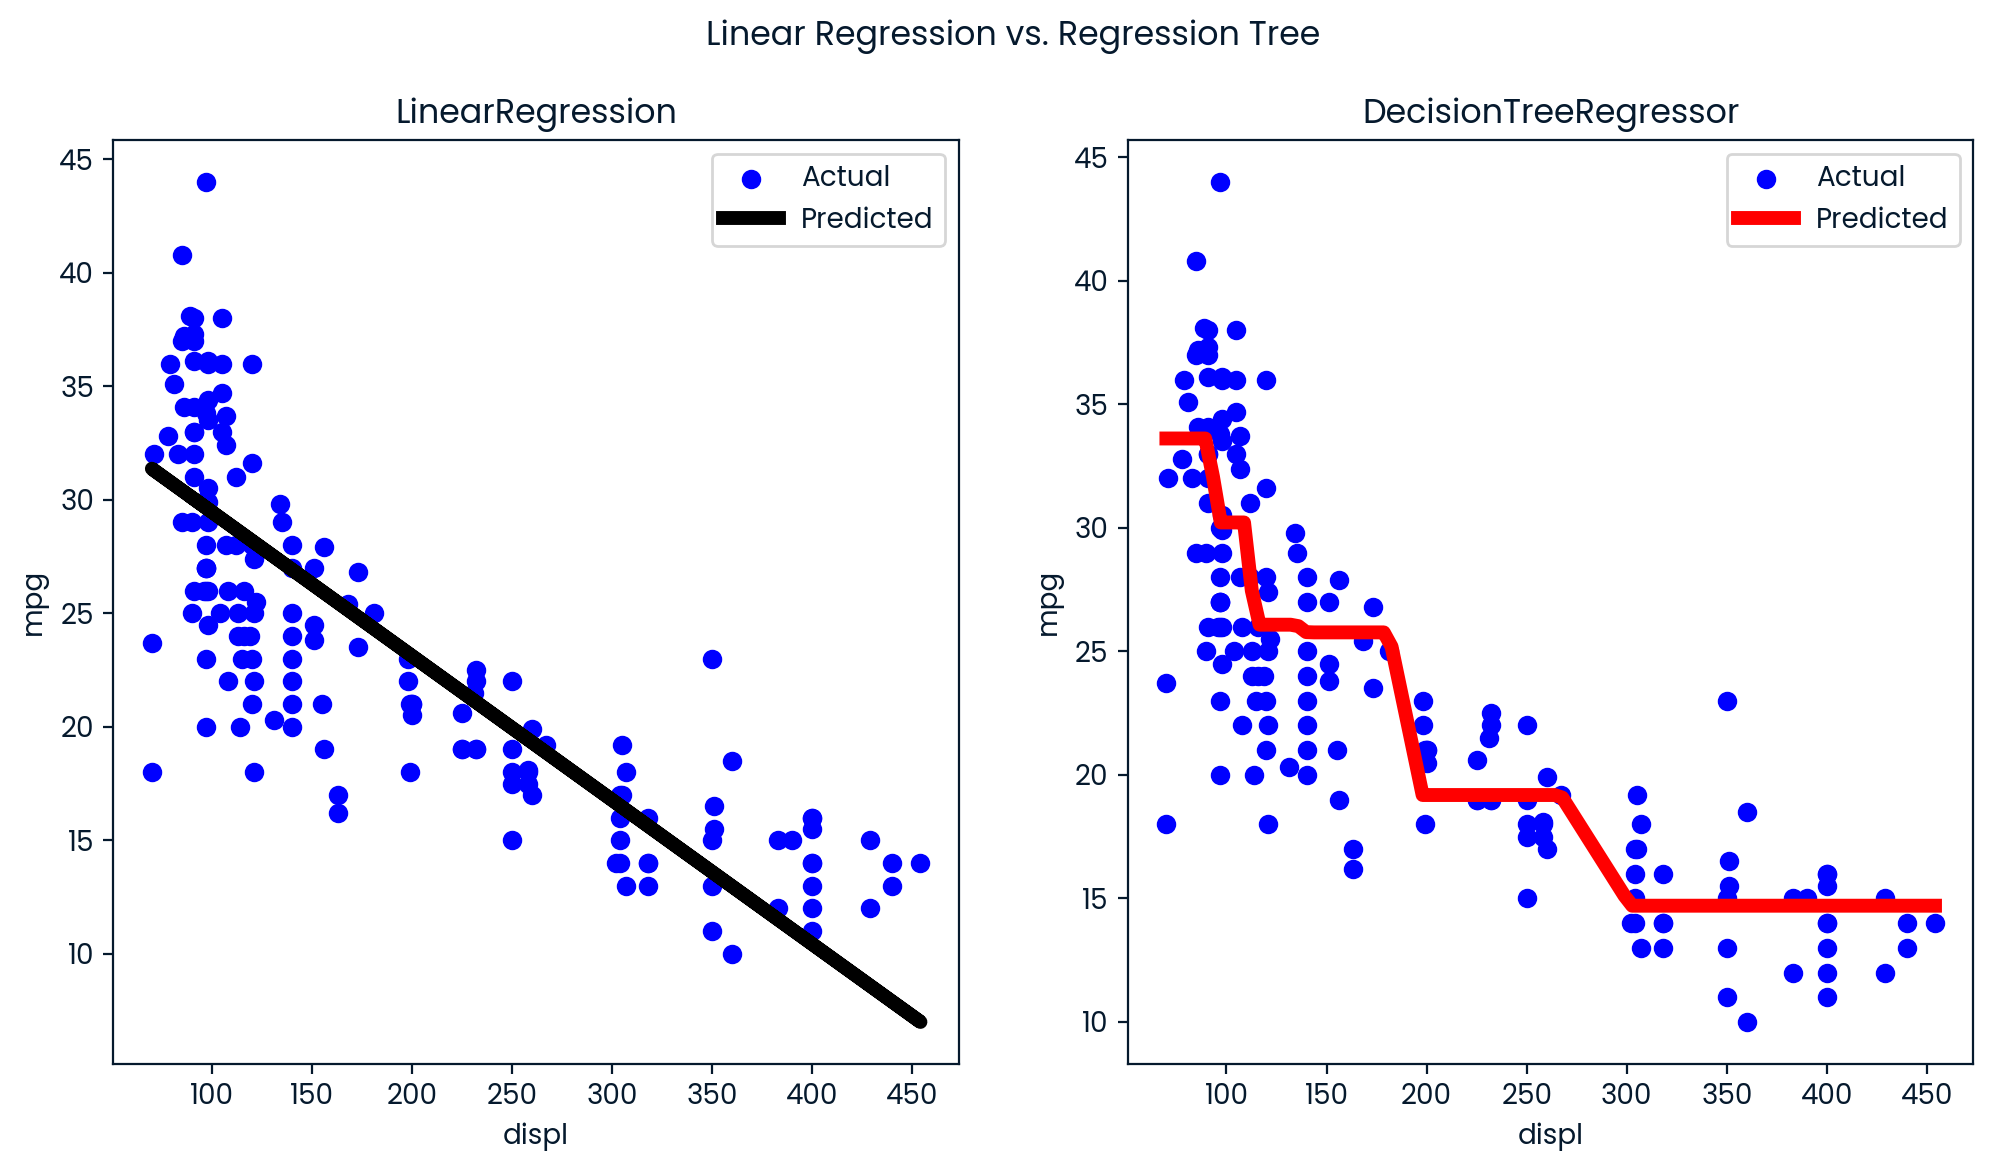

In [214]:
from scipy.interpolate import interp1d
unique_displacements = np.unique(X_test)
# Get predicted values for each unique displacement
predicted_values = dt.predict(unique_displacements.reshape(-1, 1))

# Interpolate to get predictions for a denser range of displacements
interp_func = interp1d(unique_displacements, predicted_values, kind='linear')
dense_displacements = np.linspace(unique_displacements.min(), unique_displacements.max(), 100)
smoothed_predictions = interp_func(dense_displacements)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='black', linewidth=5, label='Predicted')
plt.title('LinearRegression')
plt.xlabel('displ')
plt.ylabel('mpg')
plt.legend()

# Plot for Decision Tree Regressor
#plt.subplot(1, 2, 2)
#plt.scatter(X_test, y_test, color='blue', label='Actual')
#plt.plot(X_test, y_pred_dt, color='red', linewidth=2, label='Predicted')
#plt.title('DecisionTreeRegressor')
#plt.xlabel('displ')
#plt.ylabel('mpg')
#plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(dense_displacements, smoothed_predictions, color='red', linewidth=5, label='Predicted')
plt.title('DecisionTreeRegressor')
plt.xlabel('displ')
plt.ylabel('mpg')
plt.legend()

plt.suptitle('Linear Regression vs. Regression Tree')
plt.show()

Böylelikle, karar ağaçlarını derinlemesine incelediğimiz ilk yazımızın sonuna gelmiş olduk. Bundan sonraki bölümde **Bias-Variance Tradeoff**, **Bagging**, **Random Forests**, **Boosting** ve **Model Tuning** kavramlarına değineceğiz.

Sonraki yazılarda görüşmek üzere.